# Projet de Machine Learning
## Gym Members Exercise Dataset

### EHRHART Elsa, SLISSE Paul, STAUB Guillaume, HOSSEINI Arman

In [1]:
path <- "./gym_members_exercise_tracking.csv"
gym <- read.table(path,sep = ",", header = TRUE)
# Premières lignes du jeu de données
head(gym)
# Vérification du contenu
summary(gym)

,Age,Gender,Weight..kg.,Height..m.,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration..hours.,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake..liters.,Workout_Frequency..days.week.,Experience_Level,BMI
,<int>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,56,Male,88.3,1.71,180,157,60,1.69,1313,Yoga,12.6,3.5,4,3,30.20
2,46,Female,74.9,1.53,179,151,66,1.30,883,HIIT,33.9,2.1,4,2,32.00
3,32,Female,68.1,1.66,167,122,54,1.11,677,Cardio,33.4,2.3,4,2,24.71
4,25,Male,53.2,1.70,190,164,56,0.59,532,Strength,28.8,2.1,3,1,18.41
5,38,Male,46.1,1.79,188,158,68,0.64,556,Strength,29.2,2.8,3,1,14.39
6,56,Female,58.0,1.68,168,156,74,1.59,1116,HIIT,15.5,2.7,5,3,20.55


      Age           Gender           Weight..kg.       Height..m.   
 Min.   :18.00   Length:973         Min.   : 40.00   Min.   :1.500  
 1st Qu.:28.00   Class :character   1st Qu.: 58.10   1st Qu.:1.620  
 Median :40.00   Mode  :character   Median : 70.00   Median :1.710  
 Mean   :38.68                      Mean   : 73.85   Mean   :1.723  
 3rd Qu.:49.00                      3rd Qu.: 86.00   3rd Qu.:1.800  
 Max.   :59.00                      Max.   :129.90   Max.   :2.000  
    Max_BPM         Avg_BPM       Resting_BPM    Session_Duration..hours.
 Min.   :160.0   Min.   :120.0   Min.   :50.00   Min.   :0.500           
 1st Qu.:170.0   1st Qu.:131.0   1st Qu.:56.00   1st Qu.:1.040           
 Median :180.0   Median :143.0   Median :62.00   Median :1.260           
 Mean   :179.9   Mean   :143.8   Mean   :62.22   Mean   :1.256           
 3rd Qu.:190.0   3rd Qu.:156.0   3rd Qu.:68.00   3rd Qu.:1.460           
 Max.   :199.0   Max.   :169.0   Max.   :74.00   Max.   :2.000           

In [2]:
#On change les variables qualitatives en facteur
gym["Gender"]<-as.factor(gym[,"Gender"])
gym["Workout_Type"]<-as.factor(gym[,"Workout_Type"])
gym["Experience_Level"]<-as.factor(gym[,"Experience_Level"])

On a considéré que le nombre de séance par semaine n'est pas une variable qualitative mais quantitative discrète. C'est pourquoi on ne l'a pas converti.

In [3]:
# Vérification dans le summary
summary(gym)

      Age           Gender     Weight..kg.       Height..m.       Max_BPM     
 Min.   :18.00   Female:462   Min.   : 40.00   Min.   :1.500   Min.   :160.0  
 1st Qu.:28.00   Male  :511   1st Qu.: 58.10   1st Qu.:1.620   1st Qu.:170.0  
 Median :40.00                Median : 70.00   Median :1.710   Median :180.0  
 Mean   :38.68                Mean   : 73.85   Mean   :1.723   Mean   :179.9  
 3rd Qu.:49.00                3rd Qu.: 86.00   3rd Qu.:1.800   3rd Qu.:190.0  
 Max.   :59.00                Max.   :129.90   Max.   :2.000   Max.   :199.0  
    Avg_BPM       Resting_BPM    Session_Duration..hours. Calories_Burned 
 Min.   :120.0   Min.   :50.00   Min.   :0.500            Min.   : 303.0  
 1st Qu.:131.0   1st Qu.:56.00   1st Qu.:1.040            1st Qu.: 720.0  
 Median :143.0   Median :62.00   Median :1.260            Median : 893.0  
 Mean   :143.8   Mean   :62.22   Mean   :1.256            Mean   : 905.4  
 3rd Qu.:156.0   3rd Qu.:68.00   3rd Qu.:1.460            3rd Qu.:1076.0

In [4]:
library(ggplot2)
library(gridExtra)

Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”


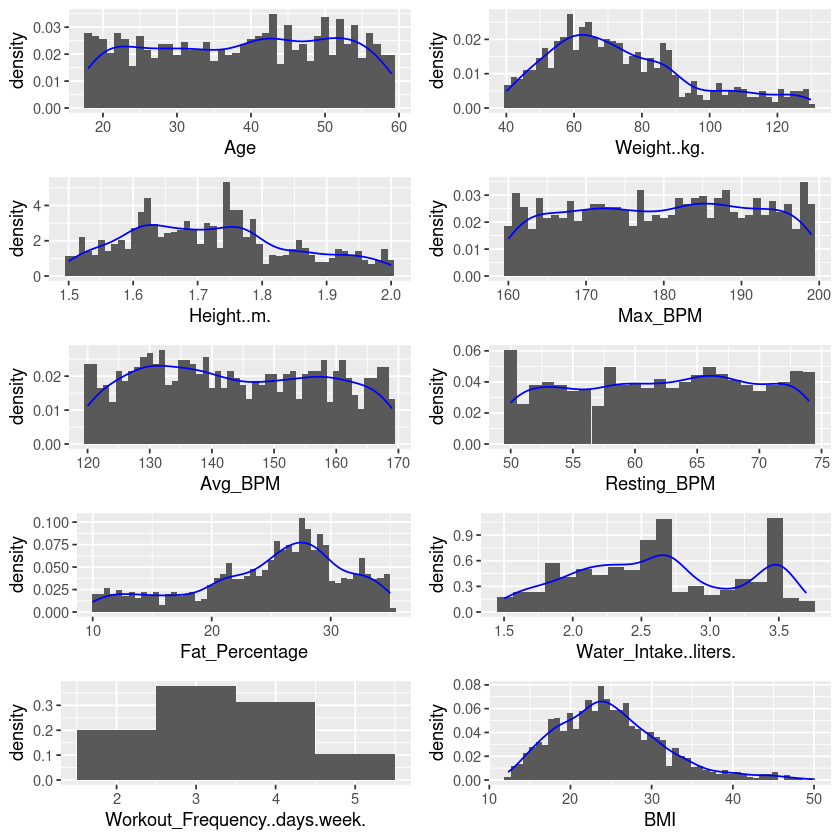

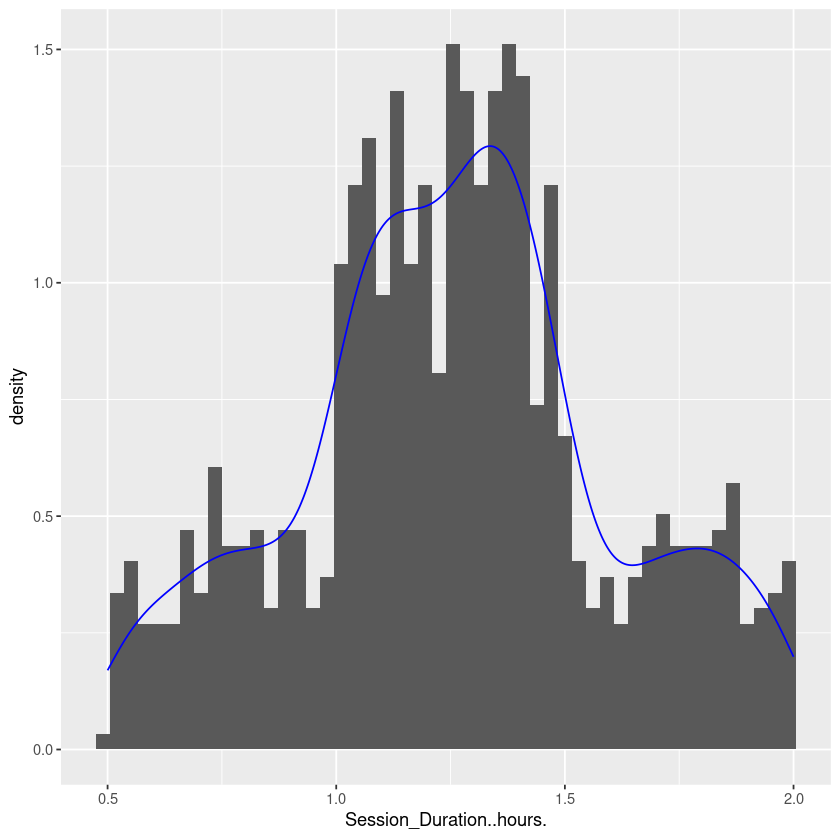

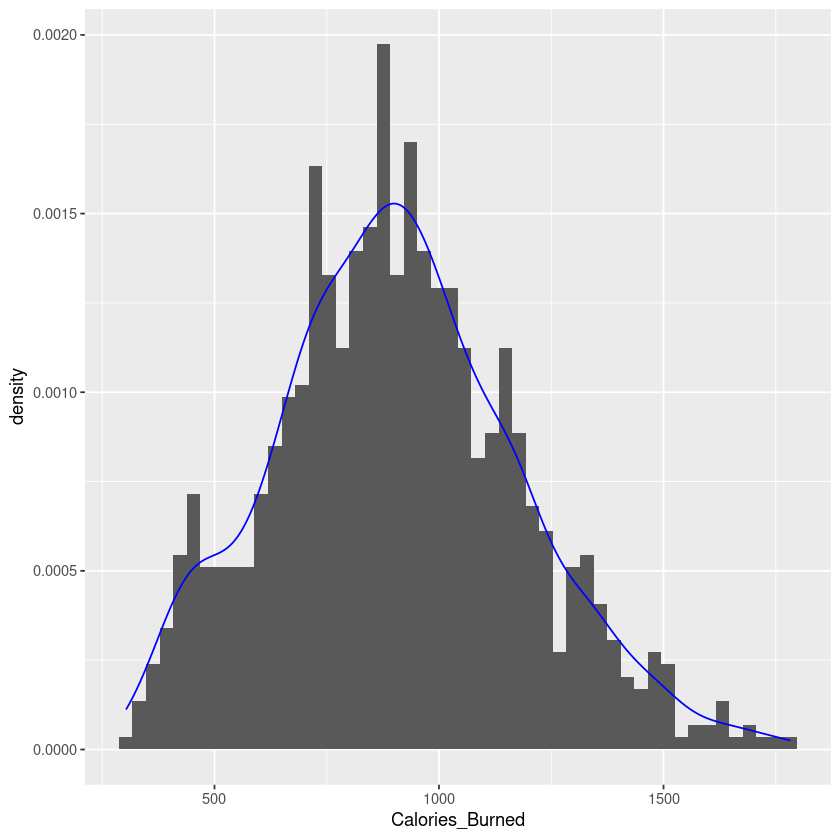

In [5]:
g1<-ggplot(gym,aes(x=Age))+geom_histogram(aes(y=after_stat(density)),bins=max(gym[,"Age"])-min(gym[,"Age"])+1)+geom_density(alpha=.2, col="blue") # pour les variables qui prennent des valeurs discrètes
#g2<-ggplot(gym,aes(x=Gender))+geom_histogram(aes(y=..density..),bins=50)+geom_density(alpha=.2, col="blue")
g3<-ggplot(gym,aes(x=Weight..kg.))+geom_histogram(aes(y=..density..),bins=50)+geom_density(alpha=.2, col="blue") 
g4<-ggplot(gym,aes(x=Height..m.))+geom_histogram(aes(y=..density..),bins=50)+geom_density(alpha=.2, col="blue") 
g5<-ggplot(gym,aes(x=Max_BPM))+geom_histogram(aes(y=after_stat(density)),bins=max(gym[,"Max_BPM"])-min(gym[,"Max_BPM"])+1)+geom_density(alpha=.2, col="blue") 
g6<-ggplot(gym,aes(x=Avg_BPM))+geom_histogram(aes(y=..density..),bins=max(gym[,"Avg_BPM"])-min(gym[,"Avg_BPM"])+1)+geom_density(alpha=.2, col="blue") 
g7<-ggplot(gym,aes(x=Resting_BPM))+geom_histogram(aes(y=..density..),bins=max(gym[,"Resting_BPM"])-min(gym[,"Resting_BPM"])+1)+geom_density(alpha=.2, col="blue") 
g8<-ggplot(gym,aes(x=Session_Duration..hours.))+geom_histogram(aes(y=..density..),bins=50)+geom_density(alpha=.2, col="blue")
g9<-ggplot(gym,aes(x=Calories_Burned))+geom_histogram(aes(y=after_stat(density)),bins=50)+geom_density(alpha=.2, col="blue") 
#g10<-ggplot(gym,aes(x=Workout_Type))+geom_histogram(aes(y=..density..),bins=50)+geom_density(alpha=.2, col="blue") 
g11<-ggplot(gym,aes(x=Fat_Percentage))+geom_histogram(aes(y=..density..),bins=50)+geom_density(alpha=.2, col="blue") 
g12<-ggplot(gym,aes(x=Water_Intake..liters.))+geom_histogram(aes(y=..density..),bins=20)+geom_density(alpha=.2, col="blue") 
g13<-ggplot(gym,aes(x=Workout_Frequency..days.week.))+geom_histogram(aes(y=after_stat(density)),bins=max(gym[,"Workout_Frequency..days.week."])-min(gym[,"Workout_Frequency..days.week."])+1) 
#g14<-ggplot(gym,aes(x=Experience_Level))+geom_histogram(aes(y=..density..),bins=50)+geom_density(alpha=.2, col="blue") 
g15<-ggplot(gym,aes(x=BMI))+geom_histogram(aes(y=..density..),bins=50)+geom_density(alpha=.2, col="blue") 

grid.arrange(g1,g3,g4,g5,g6,g7,g11,g12,g13,g15,ncol=2)
grid.arrange(g8, ncol = 1)
grid.arrange(g9, ncol = 1)

In [6]:
#g1<-ggplot(gym,aes(x=Age))+geom_histogram(aes(y=after_stat(density)), bins = 10)+geom_density(alpha=.2, col="blue") 
#grid.arrange(g1,ncol=1)

Analyse unidimensionnelle des variables quantitatives : 

- Age : répartition quasi-uniforme de la majorité à 60 ans
- Poids : répartition asymétrique (forme de courbe en chi-2) avec un pic aux alentours de 60kg
- Taille : répartition asymétrique, somme de deux gaussiennes, une centrée autour de 1m63 (correspondant aux femmes), et une centrée autour de 1m75 (correspondant aux hommes)
- BPM max : répartition quasi-uniforme de 160 à 200 bpm
- BPM moyen : répartition quasi-uniforme de 120 à 170 bpm
- BPM au repos : répartition quasi-uniforme de 50 à 75 bpm
- Durée de la session : répartition symétrique, similaire à une gaussienne ou une double gaussienne : on constate que les séances majoritaires sont celles entre 1h et 1h30
- Calories brûlées : répartition légèrement asymétrique, la majorité des séances brûlent moins que 1000 calories
- Pourcentage de masse graisseuse : répartition asymétrique, avec un pic autour de 27%
- Apport en eau : répartition asymétrique avec des pics aux alentours de 2.7L et 3.5L
- Fréquence d'entraînement : la majorité des individus font 3 à 4 séances par semaine (sportifs réguliers)
- Indice de masse corporelle : répartition asymétrique (forme de courbe en chi-2) avec un pic aux alentours de 23

Analyse unidimensionnelle des variables qualitatives :

- un peu plus d'hommes que de femmes dans le jeu de données, mais ce n'est pas notable et pas suffisant pour que ça puisse biaiser nos résultats et conclusions.
- type d'entraînement : une répartition quasi-uniforme entre le cardio, l'entraînement fractionné de haute intensité (HIIT), la force athlétique et le yoga, on a donc tous types de profils.
- niveau d'expérience : majorité de personnes à niveau intermédiaire (à nuancer quand même car ce sont des personnes de niveau intermédiaire parmi l'échantillon constitué de pratiquants réguliers à cette salle de sport !). 

On souhaite rendre les distributions asymétriques plus symétriques et "gaussiennes" pour pouvoir appliquer ensuite des techniques de modélisation linéaire. Pour cela, on teste des transformations de type racine ou logarithme sur nos données et on retient celles qui donnent des résultats sensiblement plus symétriques que les distributions originelles. Ce sont les suivantes :

In [7]:
#gym[,"SWeight..kg."] <- sqrt((gym[,"Weight..kg."]))
gym[,"LWeight..kg."] <- log((gym[,"Weight..kg."]))
#gym[,"SHeight..m."] <- sqrt((gym[,"Height..m."]))
#gym[,"LHeight..m."] <- log((gym[,"Height..m."]))
#gym[,"SFat_Percentage"] <- sqrt((gym[,"Fat_Percentage"]))
#gym[,"LFat_Percentage"] <- log((gym[,"Fat_Percentage"]))
#gym[,"SWater_Intake..liters."] <- sqrt((gym[,"Water_Intake..liters."]))
#gym[,"LWater_Intake..liters."] <- log((gym[,"Water_Intake..liters."]))
#gym[,"SBMI"] <- sqrt((gym[,"BMI"]))
gym[,"LBMI"] <- log((gym[,"BMI"]))

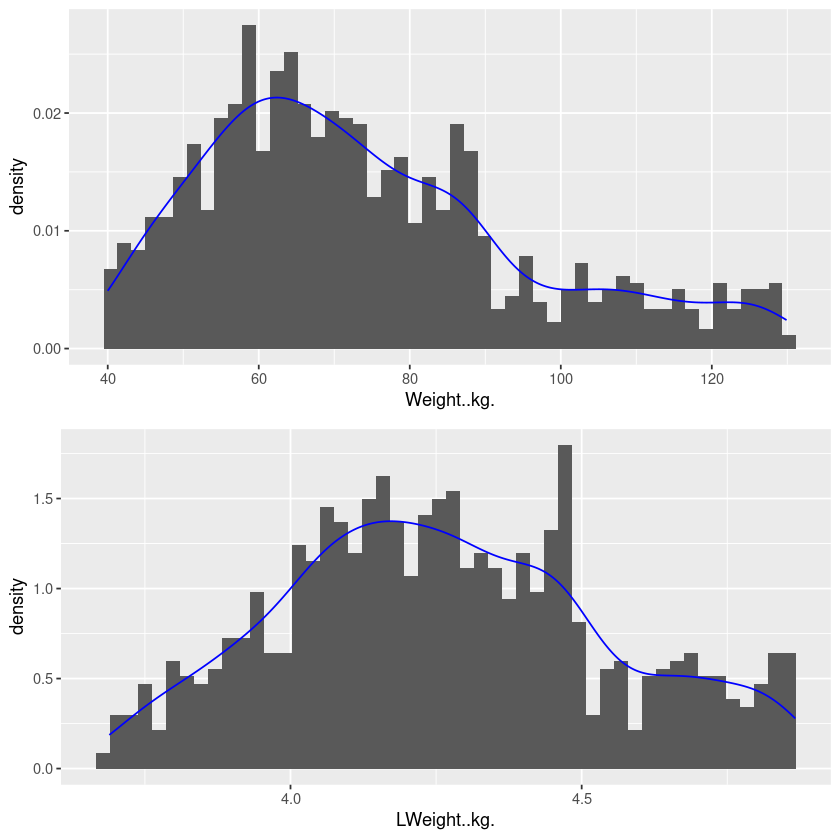

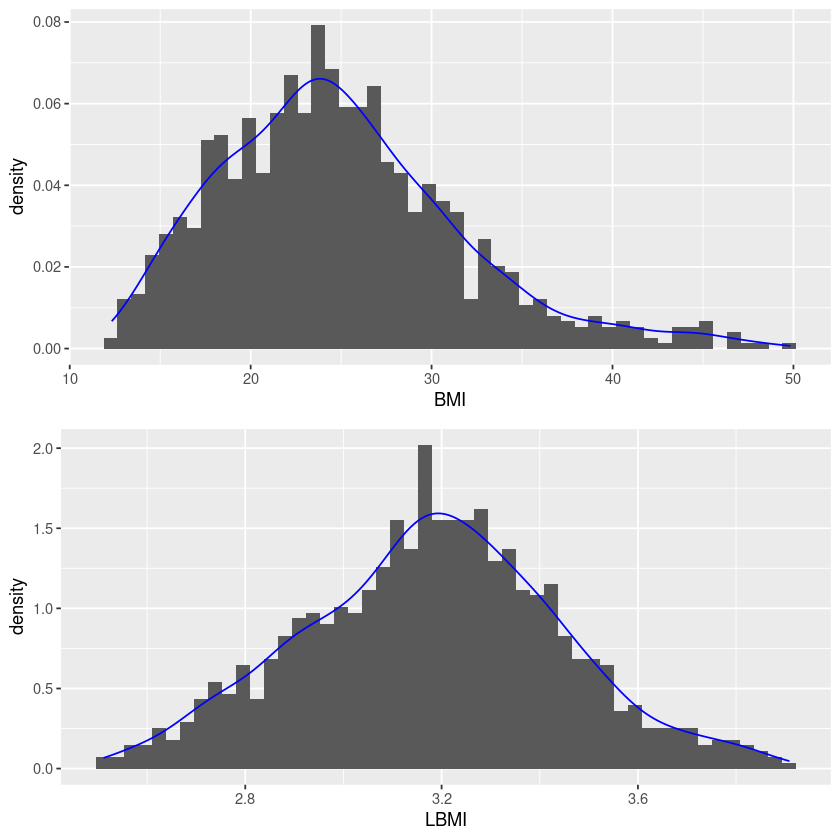

In [8]:
#g16<-ggplot(gym,aes(x=SWeight..kg.))+geom_histogram(aes(y=..density..),bins=50)+geom_density(alpha=.2, col="blue") 
g162<-ggplot(gym,aes(x=LWeight..kg.))+geom_histogram(aes(y=..density..),bins=50)+geom_density(alpha=.2, col="blue") 
#g17<-ggplot(gym,aes(x=SHeight..m.))+geom_histogram(aes(y=..density..),bins=50)+geom_density(alpha=.2, col="blue")
#g18<-ggplot(gym,aes(x=LHeight..m.))+geom_histogram(aes(y=..density..),bins=50)+geom_density(alpha=.2, col="blue")
#g21<-ggplot(gym,aes(x=SFat_Percentage))+geom_histogram(aes(y=..density..),bins=50)+geom_density(alpha=.2, col="blue")
#g22<-ggplot(gym,aes(x=LFat_Percentage))+geom_histogram(aes(y=..density..),bins=50)+geom_density(alpha=.2, col="blue")
#g23<-ggplot(gym,aes(x=SWater_Intake..liters.))+geom_histogram(aes(y=..density..),bins=20)+geom_density(alpha=.2, col="blue")
#g24<-ggplot(gym,aes(x=LWater_Intake..liters.))+geom_histogram(aes(y=..density..),bins=20)+geom_density(alpha=.2, col="blue") 
#g25<-ggplot(gym,aes(x=SBMI))+geom_histogram(aes(y=..density..),bins=50)+geom_density(alpha=.2, col="blue")
g26<-ggplot(gym,aes(x=LBMI))+geom_histogram(aes(y=..density..),bins=50)+geom_density(alpha=.2, col="blue")

grid.arrange(g3,g162,ncol=1)
#grid.arrange(g4, g17, g18, ncol=1)
#grid.arrange(g11,g21,g22,ncol=1)
#grid.arrange(g12,g23,g24, ncol=1)
grid.arrange(g15, g26, ncol=1)

On constate que les deux transformations lograithmiques pour le poids et pour l'IMC donnent des résultats plus symétriques que précédemment, on va donc conserver ces deux nouvelles variables et supprimer les anciennes dans le jeu de données.

In [9]:
gym <- gym[,-c(3, 15)]
summary(gym)

      Age           Gender      Height..m.       Max_BPM         Avg_BPM     
 Min.   :18.00   Female:462   Min.   :1.500   Min.   :160.0   Min.   :120.0  
 1st Qu.:28.00   Male  :511   1st Qu.:1.620   1st Qu.:170.0   1st Qu.:131.0  
 Median :40.00                Median :1.710   Median :180.0   Median :143.0  
 Mean   :38.68                Mean   :1.723   Mean   :179.9   Mean   :143.8  
 3rd Qu.:49.00                3rd Qu.:1.800   3rd Qu.:190.0   3rd Qu.:156.0  
 Max.   :59.00                Max.   :2.000   Max.   :199.0   Max.   :169.0  
  Resting_BPM    Session_Duration..hours. Calories_Burned    Workout_Type
 Min.   :50.00   Min.   :0.500            Min.   : 303.0   Cardio  :255  
 1st Qu.:56.00   1st Qu.:1.040            1st Qu.: 720.0   HIIT    :221  
 Median :62.00   Median :1.260            Median : 893.0   Strength:258  
 Mean   :62.22   Mean   :1.256            Mean   : 905.4   Yoga    :239  
 3rd Qu.:68.00   3rd Qu.:1.460            3rd Qu.:1076.0                 
 Max.   :7

Analyse descriptive bidimensionnelle

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



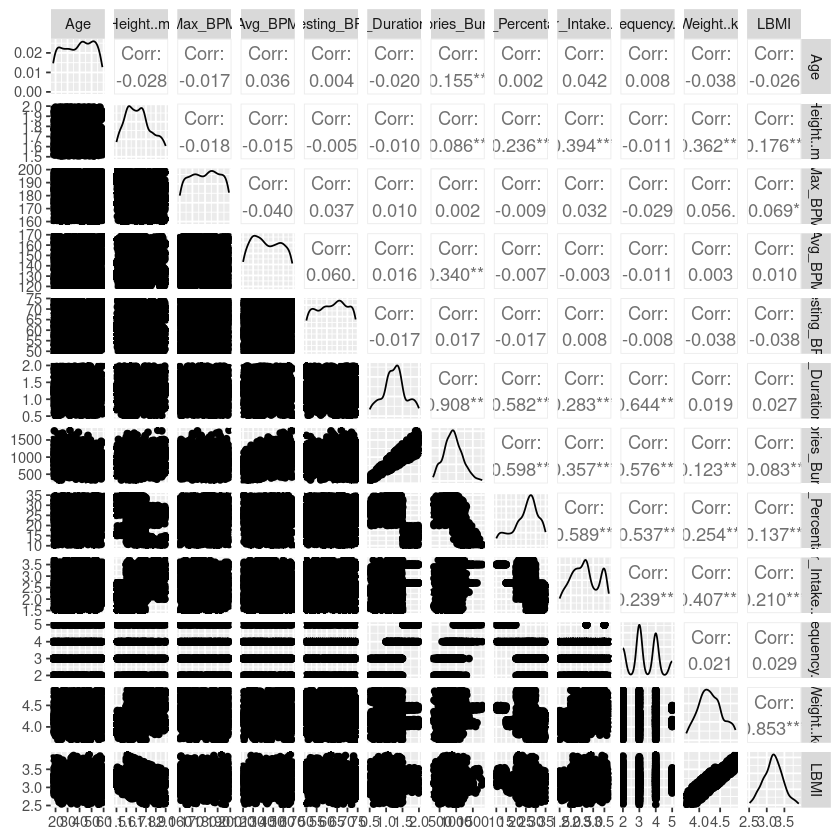

In [10]:

library(GGally)
gym_num <- gym[, -c(2, 9, 13)]
ggpairs(gym_num)

In [11]:
install.packages("ggplot2", dependencies = TRUE)

Installation du package dans ‘/home/staub/R/libs’
(car ‘lib’ n'est pas spécifié)

installation des dépendances ‘checkmate’, ‘zoo’, ‘wk’, ‘pkgbuild’, ‘rprojroot’, ‘rex’, ‘htmlTable’, ‘TH.data’, ‘sandwich’, ‘classInt’, ‘s2’, ‘units’, ‘brio’, ‘desc’, ‘evaluate’, ‘pkgload’, ‘praise’, ‘waldo’, ‘withr’, ‘diffobj’, ‘covr’, ‘ggplot2movies’, ‘hexbin’, ‘Hmisc’, ‘mapproj’, ‘maps’, ‘multcomp’, ‘profvis’, ‘ragg’, ‘sf’, ‘testthat’, ‘vdiffr’


Warning message in install.packages("ggplot2", dependencies = TRUE):
“l'installation du package ‘units’ a eu un statut de sortie non nul”
Warning message in install.packages("ggplot2", dependencies = TRUE):
“l'installation du package ‘sf’ a eu un statut de sortie non nul”


corrplot 0.95 loaded



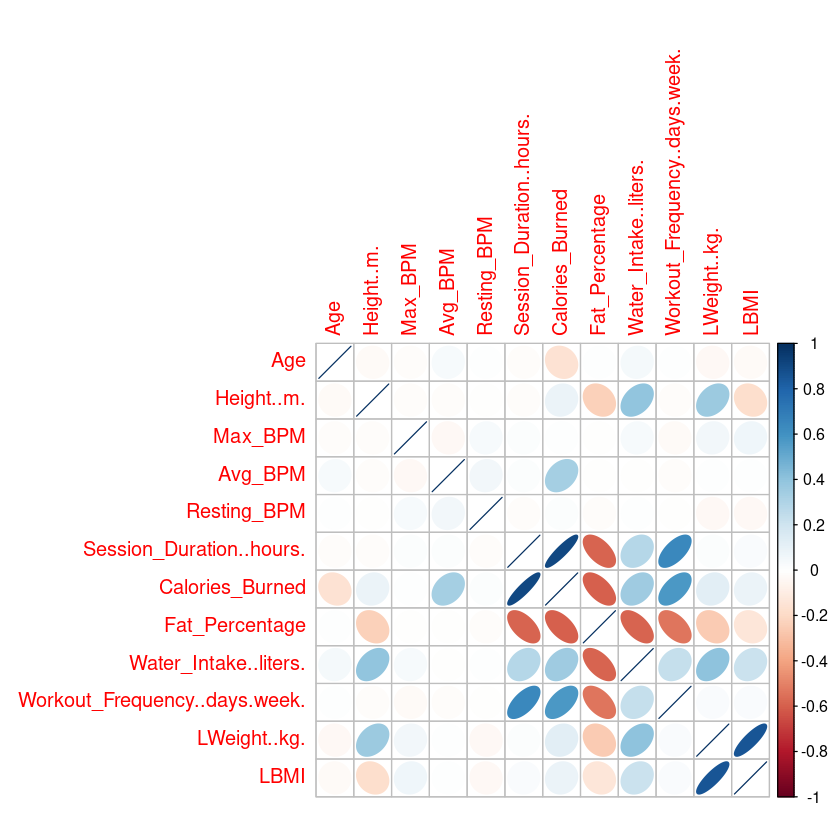

In [12]:
library(corrplot)
gym_num <- gym[, -c(2, 9, 13)]
corrplot(cor(gym_num), method="ellipse")

On remarque les corrélations significatives suivantes :

- les individus qui font des sessions plus longues brûlent davantage de calories par session (ce qui est cohérent)
- les individus qui font des sessions plus longues ont tendance à avoir des pourcentages de masse graisseuse plus bas
- les individus qui font des sessions plus longues ont tendance à faire des séances plus souvent
- les individus qui brûlent beaucoup de calories par session ont tendance à avoir des pourcentages de masse graisseuse plus bas
- les individus qui brûlent beaucoup de calories par session ont tendance à faire des séances plus souvent
- les individus qui ont des pourcentages de masse graisseuse plus bas consomment davantage d'eau (ce qui est surprenant dans une certaine mesure!)
- les individus qui ont des pourcentages de masse graisseuse plus bas ont tendance à faire des séances plus souvent (cohérent)
- plus les individus sont lourds, plus leur IMC a tendance à être elevé (ce qui est cohérent car c'est l'un des facteurs rentrant dans le calcul de l'IMC)